Se debe hallar el volumen de la chocolatera del profesor.
La boca de la chocolatera tiene un diámetro experimental de 12.3 cm.
Asumiendo que es simétrica rotacionalmente bajo la perspectiva de la figura, despreciando
el mango y el grosor del aluminio:
- Hallar una expresión para la curva de la chocolatera.
- Hallar su volumen usando dos métodos de integración numérica . 
- Calcule los errores relativos asociados sabiendo que el valor experimental es de 2200 ml.

Required packages

In [ ]:
from numericalMethods import interpolation, integration
from utilities import read_interpolation_points, plot_points, plot_function_expresion
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import sympy as sp

Se tomó la siguiente foto de la chocolatera.

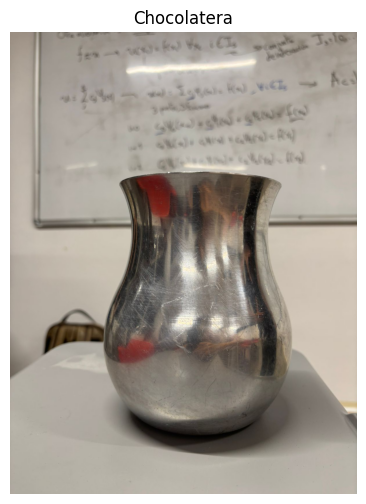

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
img1 = mpimg.imread("assets/Chocolatera.jpg")
ax.imshow(img1)
ax.axis("off")
ax.set_title("Chocolatera")
plt.show()

Se encontraron varios puntos de la chocolatera en [desmos](https://www.desmos.com/geometry/wmzbxizdba?lang=es). Después se leen los puntos, y se grafican.

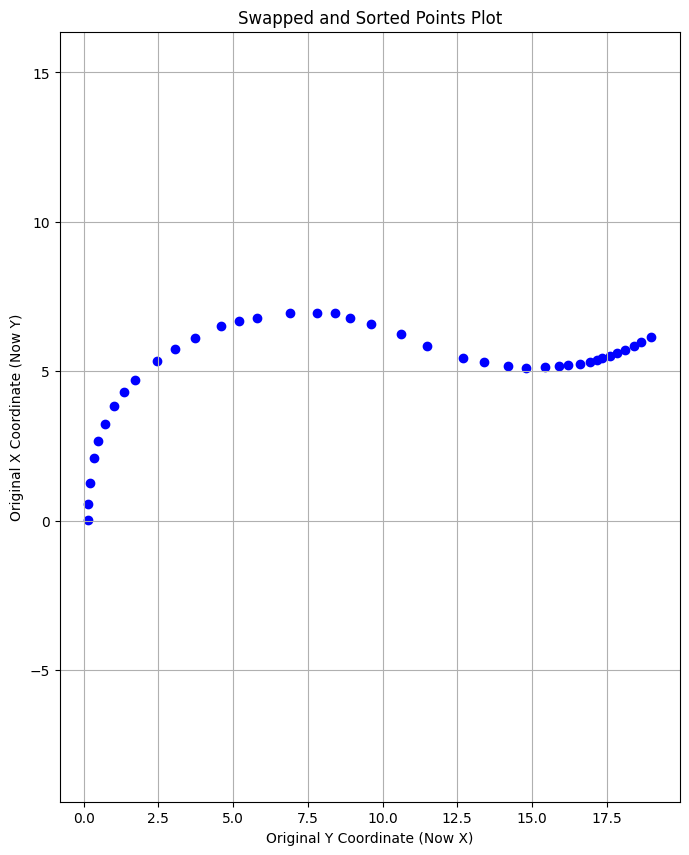

Number of points: 39


In [3]:
chocolatera_points = read_interpolation_points('interpolationPoints.txt')
plot_points(chocolatera_points)
# Number of points
num_points = len(chocolatera_points)
print(f"Number of points: {num_points}")

Ahora se construyen dos polinomios que pasan exactamente por todos los puntos dados.  

**Polinomio de Legendre (global)**: Se aproxima la función usando polinomios de Legendre \( P_0(x), P_1(x), \dots \), 
que forman una base ortogonal.   Se usan todos los puntos para ajustar un solo polinomio expresado en esta base.

**Interpolación por tramos (piecewise) con 3 puntos**: Se divide el conjunto de datos en grupos consecutivos de 3 puntos.  
Para cada grupo se construye un polinomio cuadrático que interpola solo esos 3 puntos.   El resultado final es una función definida por tramos, cada tramo con su propio polinomio.

Se grafican ambos.

In [4]:

# Global Legendre polynomial
global_poly = interpolation.lagrange_interpolation(chocolatera_points)
# Piecewise Legendre polynomial
piecewise_poly = interpolation.piecewise_lagrange_interpolation(chocolatera_points, 3)

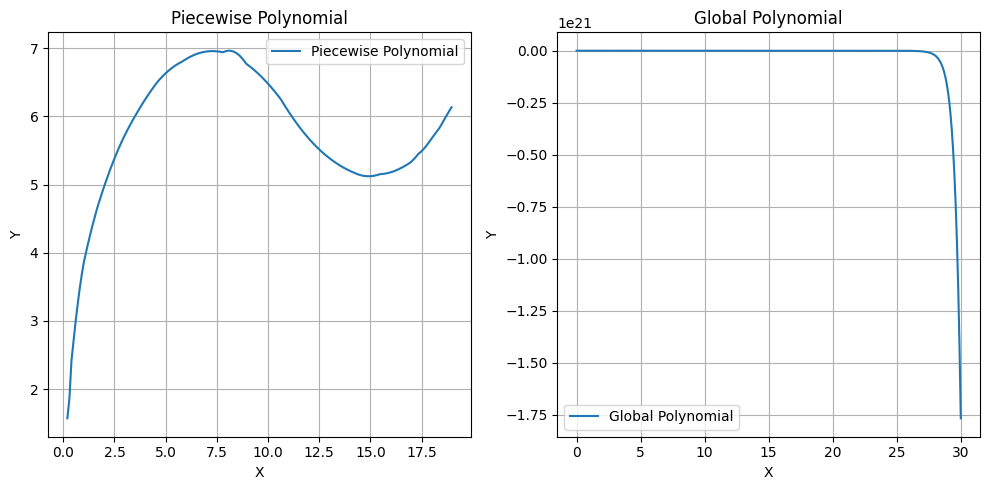

In [ ]:
plot_function_expresion({"Piecewise Polynomial": [piecewise_poly, 0, 30], "Global Polynomial": [global_poly, 0, 30]}, same_plot=False)

Notamos que la función global sufre del fenómeno de Runge (el escalamiento del gráfico es de 1e21), pero la interpolación `Piecewise`, dividida en intervalos de 3 puntos, representa bien la figura.

Hay 39 puntos, por lo que la función global es un polinomio de grado 38, mientras que cada polinomio `Piecewise` es de apenas 2 y está definido por casos.

Hallamos entonces el sólido en revolución del `Piecewise Polynomial`.

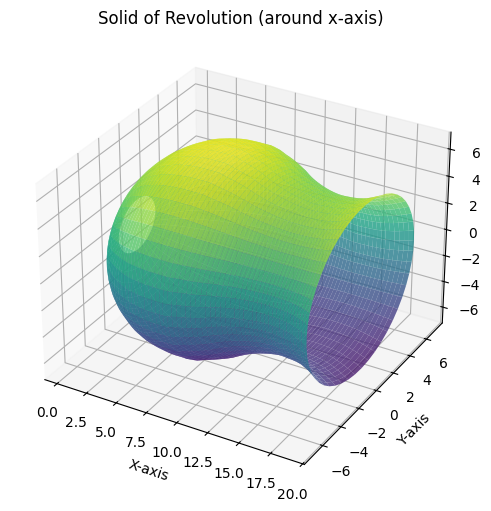

In [6]:
integration.graph_revolution_solid(piecewise_poly, 0, 30)

Y hallamos el volumen integrando numéricamente con el número de subintervalos siendo `n = 100` y para el método de Gauss-Legendre `n = 3`.

In [7]:
exact_value = 2200  # ml
x = sp.symbols('x')
# Limit as x -> 1⁻
left_limit = chocolatera_points[0][0]  # Assuming the first point is the left limit

# Limit as x -> 1⁺
right_limit = chocolatera_points[-1][0]  # Assuming the last point is the right limit

n = 100

methods = {
    "Midpoint Rule": integration.revolution_solid_volume(piecewise_poly, left_limit, right_limit, integration.midpoint_rule, n),
    "Trapezoidal Rule": integration.revolution_solid_volume(piecewise_poly, left_limit, right_limit, integration.trapezoidal_rule, n),
    "Simpson's Rule": integration.revolution_solid_volume(piecewise_poly, left_limit, right_limit, integration.simpson_rule, n),
    "Simpson 3/8 Rule": integration.revolution_solid_volume(piecewise_poly, left_limit, right_limit, integration.simpson_38_rule, n),
    "Gauss–Legendre": integration.revolution_solid_volume(piecewise_poly, left_limit, right_limit, integration.gauss_legendre, 3)
}

# Create DataFrame for results
df = pd.DataFrame([
    {
        "Method": name,
        "Result (ml)": val,
        "Relative Error (%)": abs((val - exact_value) / exact_value) * 100
    }
    for name, val in methods.items()
])

# Show table
print(df.to_string(index=False))


          Method      Result (ml) Relative Error (%)
   Midpoint Rule 2024.35772475397   7.98373978391061
Trapezoidal Rule 2024.16431045936   7.99253134275655
  Simpson's Rule 2024.32193747658   7.98536647833742
Simpson 3/8 Rule 2024.38161820226   7.98265371807920
  Gauss–Legendre 2059.20553751974   6.39974829455708


Los resultados muestran que todos los métodos de integración presentan un error relativo cercano al 8 % respecto al valor exacto (2200 ml), siendo el método de Gauss–Legendre el más preciso con un error del 6,40 %. Esto indica que, aunque hay consistencia entre los métodos, la aproximación podría mejorarse con una interpolación más precisa de la función.
